## 시계열 데이터 분해

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

start_date = '2020-01-01'
end_date = '2025-05-21'

# 애플 주식의 데이터를 불러오기
aapl = yf.download('AAPL', start=start_date, end=end_date)
# 데이터 확인
aapl.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [4]:
aapl.shape

(1353, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 2020-01-02 to 2025-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  1353 non-null   int64
dtypes: int64(1)
memory usage: 21.1+ KB


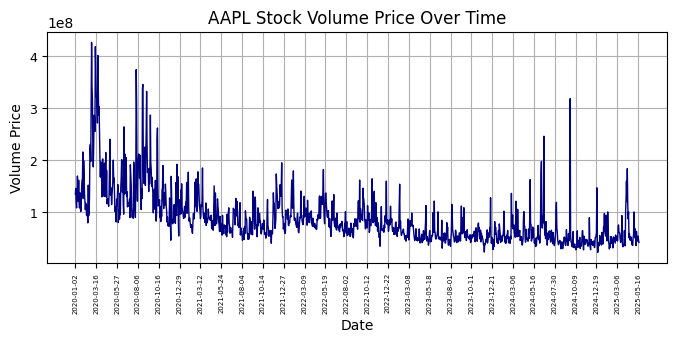

In [14]:

# 종가만 남기고 새로운 df에 정리
df = pd.DataFrame()
df['Volume'] = aapl['Volume']
# 시계열 인덱스 정리
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
df.info()

# 데이터 시각화
plt.figure(figsize=(8, 3))
plt.plot(df, color='navy', linewidth=1)
plt.title('AAPL Stock Volume Price Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.xticks(np.arange(0,1353,50), rotation=90,fontsize=5)
plt.yticks(fontsize=9)
plt.grid(True)
plt.show()

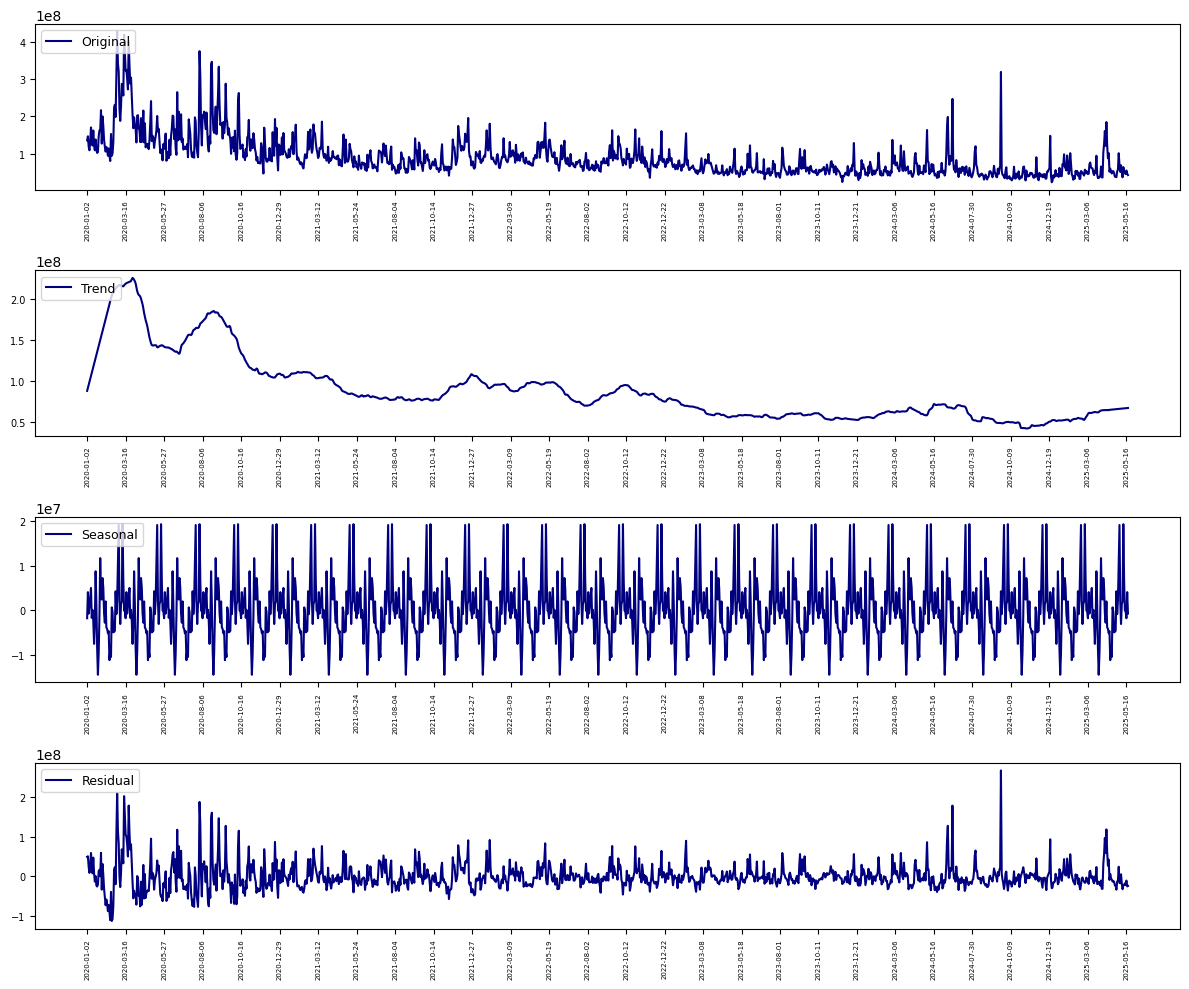

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(df, model='addictive', period=50, extrapolate_trend=True)
ts_decompose.trend

  # 결과 시각화
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(ts_decompose.observed, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1353,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 추세
plt.subplot(4, 1, 2)
plt.plot(ts_decompose.trend, label='Trend', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1353,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 계절성 
plt.subplot(4, 1, 3)
plt.plot(ts_decompose.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1353,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
# 잔차
plt.subplot(4, 1, 4)
plt.plot(ts_decompose.resid, label='Residual', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(np.arange(0,1353,50), rotation=90,fontsize=5)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()